In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/diamonds/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


# EDA

In [3]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

### There are no null values

In [4]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Let's see variables' distribution

In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


### The price can't be negative or zero

In [6]:
df = df[df['price'] > 0]

### X, Y and Z have to be non-negative

In [7]:
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

## Let's make some plots

## Univariate analysis

### Most of the diamonds have an ideal cut

<Axes: xlabel='count', ylabel='cut'>

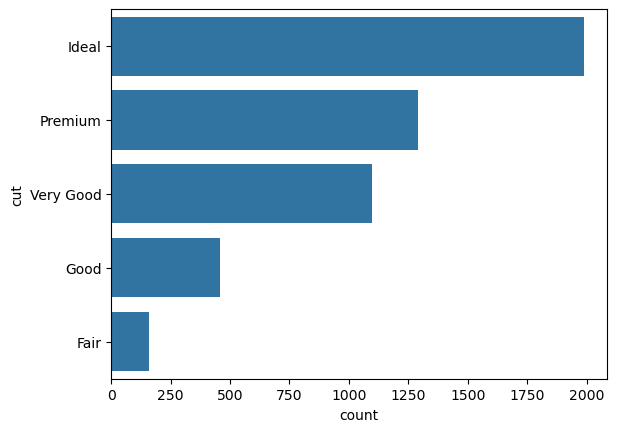

In [8]:
sns.countplot(df['cut'])

### Good color diamons are common

<Axes: xlabel='count', ylabel='color'>

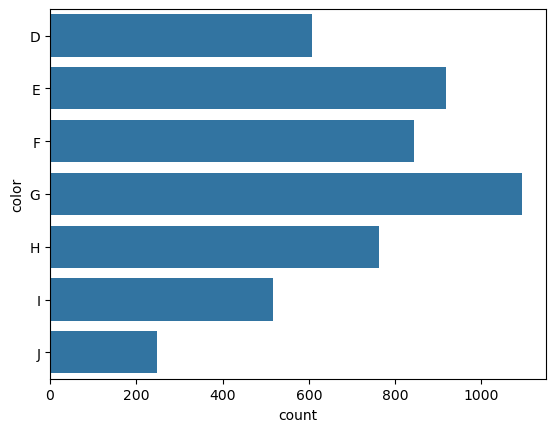

In [9]:
sns.countplot(df['color'], order=df['color'].sort_values())

### Bad clarity diamonds are very normal

<Axes: xlabel='count', ylabel='clarity'>

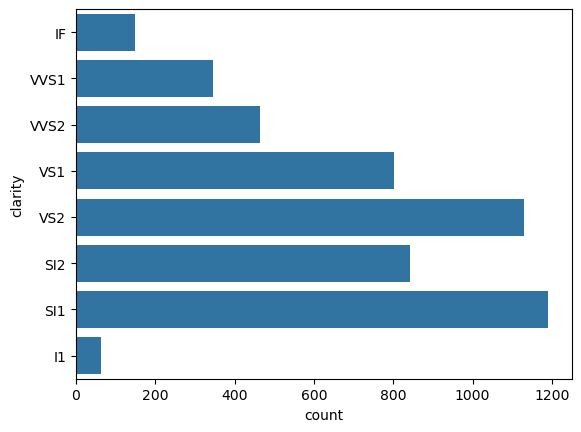

In [10]:
sns.countplot(df['clarity'], order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI2', 'SI1', 'I1'])

### Carat, table and price are right-skewed, while the other variables are zero skewed.
### Also, variables have different ranges

In [11]:
numerical_columns = df.select_dtypes(include=np.number).columns
categorical_columns = df.select_dtypes(exclude=np.number).columns

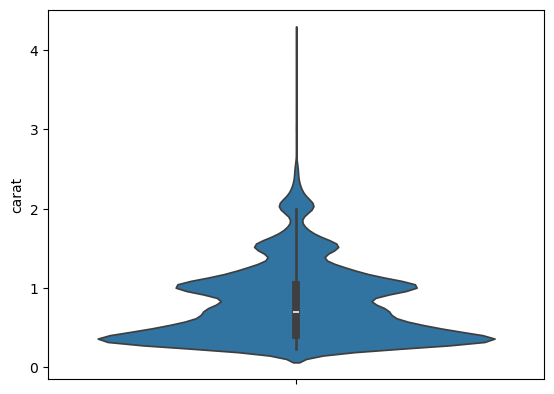

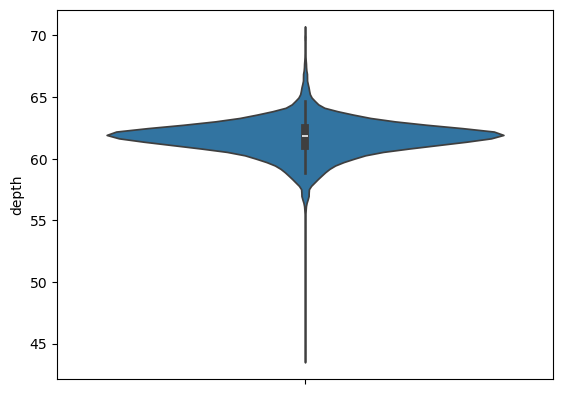

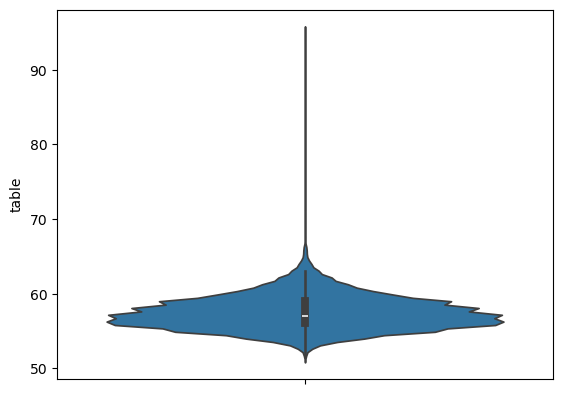

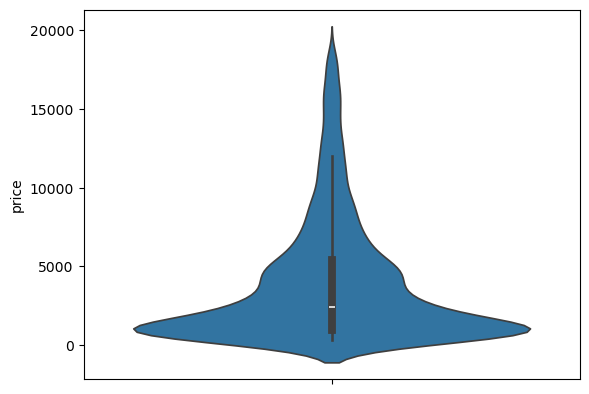

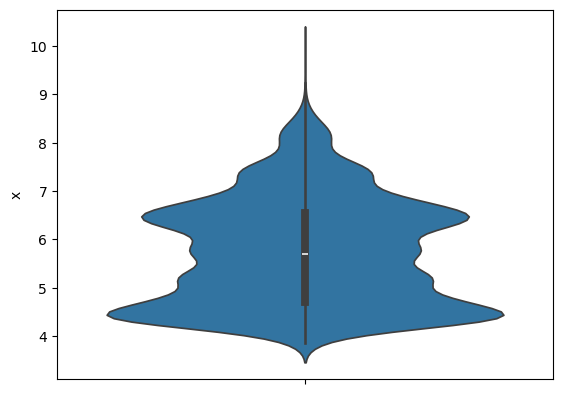

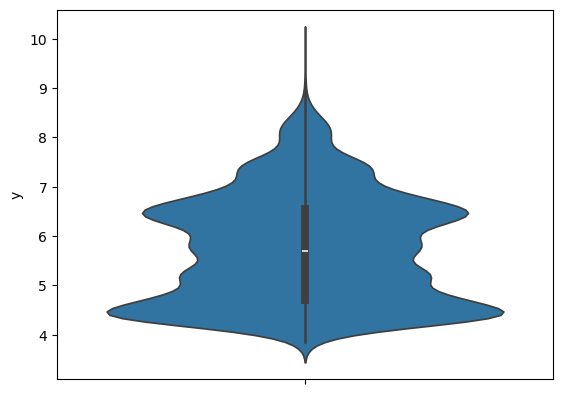

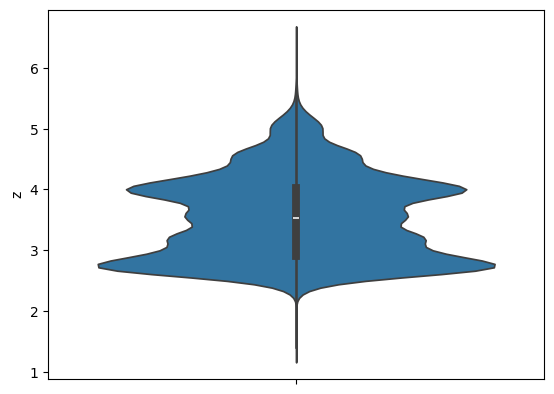

In [12]:
for column in df.columns:
    if column in numerical_columns:
        fig, ax = plt.subplots()
        ax = sns.violinplot(df[column])
plt.show()

In [13]:
df[numerical_columns].skew()

carat    1.076086
depth   -0.449439
table    1.478767
price    1.587464
x        0.377719
y        0.369058
z        0.375837
dtype: float64

### Table and depth are leptokurtic but the rest are mesokurtic

In [14]:
df[numerical_columns].kurtosis()

carat     1.157125
depth     7.114036
table    15.525537
price     2.079043
x        -0.748260
y        -0.767157
z        -0.710927
dtype: float64

## Bivariate analysis

### Surprisingly, fair and premium diamonds tend to be more expensive. Also, ideal diamonds has the lower median

<Axes: xlabel='price', ylabel='cut'>

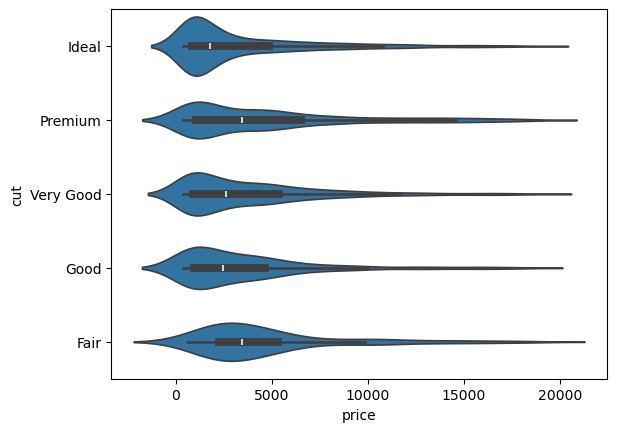

In [15]:
sns.violinplot(x='price', y='cut', data=df)

### J and I diamons are rare and expensive, while the best diamonds are common and cheap

<Axes: xlabel='price', ylabel='color'>

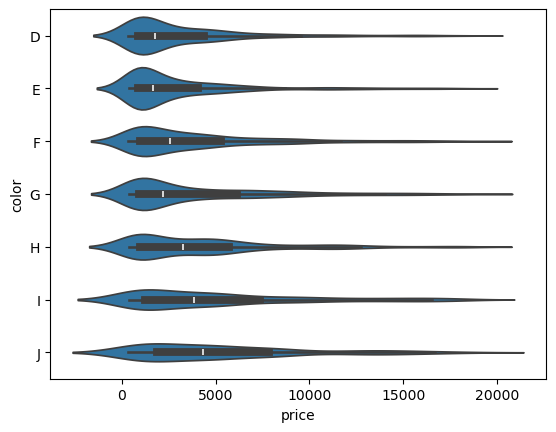

In [16]:
sns.violinplot(x='price', y='color', data=df, order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])

### Mostly clarity categories are right skewed regarding price

<Axes: xlabel='price', ylabel='clarity'>

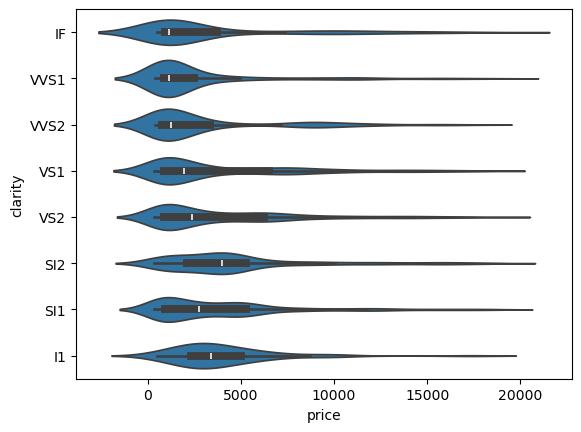

In [17]:
sns.violinplot(x='price', y='clarity', data=df, order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI2', 'SI1', 'I1'])

### x, y, z and carat apparently have a high correlation with price


In [ ]:
sns.pairplot(df)

# Feature engineering

## Feature creation

In [ ]:
df['size'] = df['x']*df['y']*df['z']

In [ ]:
sns.scatterplot(x='size', y='price', data=df)

### Categorical encoding

In [ ]:
df = df.replace(
    {
        "cut": {"Ideal": 5, "Premium": 4, "Very Good": 3, "Good": 2, "Fair": 1},
        "color": {"D": 7, "E": 6, "F": 5, "G": 4, "H": 3, "I": 2, "J": 1},
        'clarity': {"IF": 8, "VVS1": 7, "VVS2": 6, "VS1": 5, "VS2": 4, "SI1": 3, "SI2": 2, "I1": 1}
    }
)

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)